# Present the Same Data Multiple Ways

Note: I sampled the same Kaggle dataset I chose for my Prep Course Capstone Project. 

<span class="mark">SKILLS I NEED TO WORK ON: 

DataFrame Manipulation - Syntax & Permissible Operations

Plotting With PivotTables - Column Order, Melting

Plot Style Customizations - Same-Axis Plotting, Tick Size, Titles</span>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

raw_data = pd.read_csv("C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\
Thinkful\\Python Notebooks\\1 Prep Course\\endangered_african_languages.csv")
sample = raw_data[['continent', 'region', 'country', 'country code', 'location', 'gdp estimate',
                   'population estimate', 'language', 'degree of endangerment', 'number of speakers']]

nulls = sample[sample['number of speakers'].isnull()]
pd.options.mode.chained_assignment = None 
final_sample = sample.dropna(subset = ['number of speakers'])
final_sample.head()

continent              region       country country code  \
0    Africa  Sub-Saharan Africa  South Africa          ZAF   
1    Africa  Sub-Saharan Africa  South Africa          ZAF   
2    Africa  Sub-Saharan Africa  South Africa          ZAF   
3    Africa  Sub-Saharan Africa  South Africa          ZAF   
4    Africa  Sub-Saharan Africa  South Africa          ZAF   

                   location  gdp estimate  population estimate       language  \
0  POINT (21.4453 -28.5169)         27060              1990876           N|uu   
1  POINT (24.1254 -26.9352)         27060              1990876         Korana   
2  POINT (19.7314 -34.4522)         27060              1990876  Cape Khoekhoe   
3  POINT (21.0498 -31.3924)         27060              1990876           Xiri   
4  POINT (26.6748 -31.3911)         27060              1990876        !Gan!ne   

  degree of endangerment  number of speakers  
0  Critically Endangered                 8.0  
1  Critically Endangered                 6.0  
2                Extinct                 0.0  
3  Critically Endangered                87.0  
4                Extinct                 0.0

## Plotting 1 Continous Variable: 'Population Estimate'

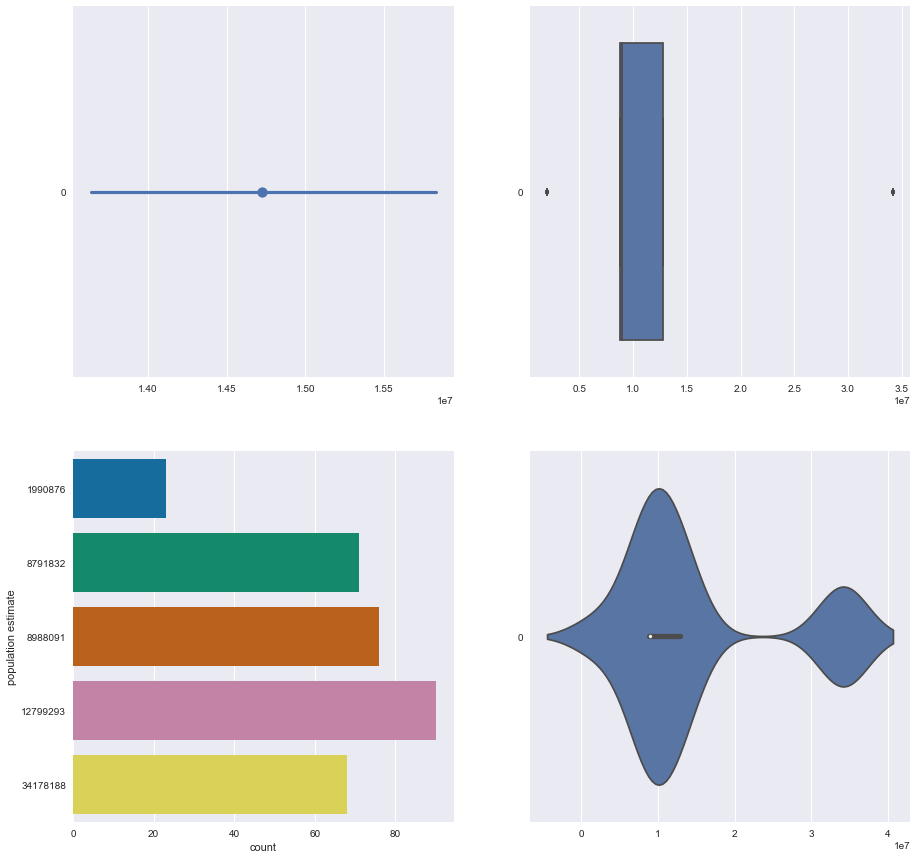

In [2]:
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plot_1 = sns.pointplot(orient='h', data=final_sample['population estimate'])
plt.subplot(2,2,2)
plot_2 = sns.boxplot(orient = 'h', data=final_sample['population estimate'])
plt.subplot(2,2,3)
plot_3 = sns.countplot(y='population estimate', orient ='h', data=final_sample, palette='colorblind')
plt.subplot(2,2,4)
plot_4 = sns.violinplot(orient = 'h', data=final_sample['population estimate'])

<span class="girk">PROS:</span> Point Plot estimates the variable's central tendency (and associated error). Box Plot shows outliers and quartiles for the variable - the median is much closer to the minimum than the maximum. Count Plot reveals that the variable has 5 unique values, which level-sets expectations for subsequent plots.

<span class="burk">CONS:</span> Count Plot bar labels are difficult to interpret and the bars are not ordered. All the x-axes except for the Count Plot's are difficult to interpret. I'm not sure how to interpret the fact that the Violin Plot shows there may be negative population estimates for some countries - if that's the case, it lowers my confidence in the dataset's quality with respect to these indices even further.

## Plotting 1 Continous Variable: 'GDP Estimate'

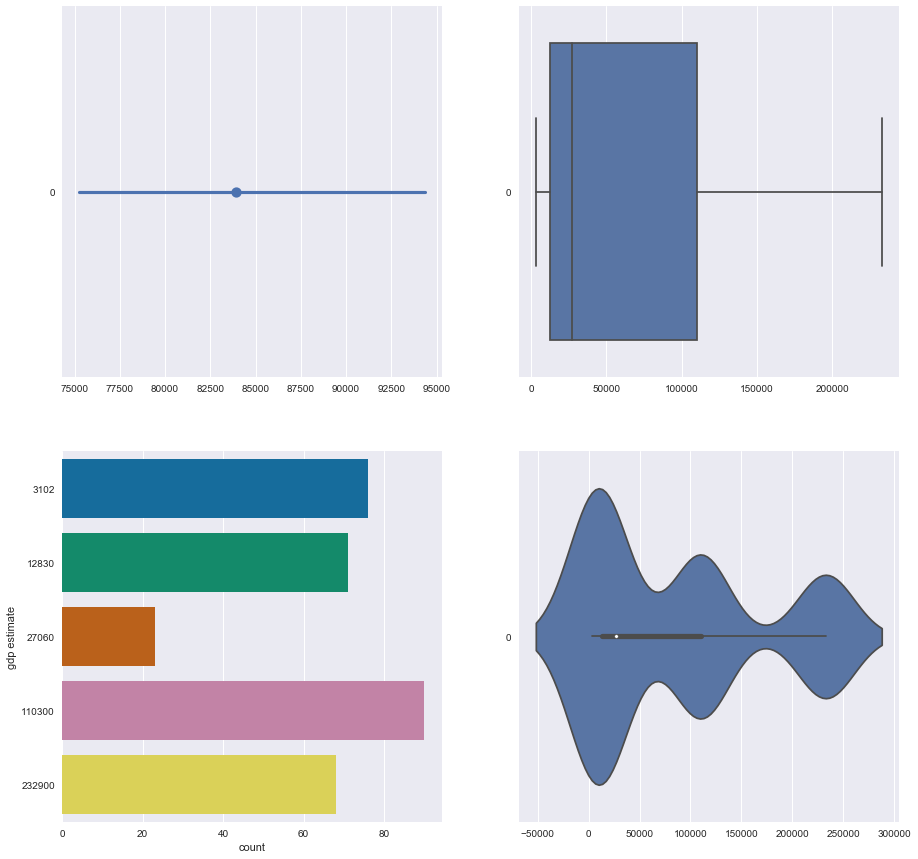

In [3]:
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plot_5 = sns.pointplot(orient='h', data=final_sample['gdp estimate'])
plt.subplot(2,2,2)
plot_6 = sns.boxplot(orient = 'h', data=final_sample['gdp estimate'])
plt.subplot(2,2,3)
plot_7 = sns.countplot(y='gdp estimate', orient ='h', data=final_sample, palette='colorblind')
plt.subplot(2,2,4)
plot_8 = sns.violinplot(orient = 'h', data=final_sample['gdp estimate'])

<span class="girk">PROS:</span> Point Plot estimates the variable's central tendency (and associated error). Box Plot shows outliers and quartiles for the variable - the median is much closer to the minimum than the maximum. Count Plot reveals that the variable has 5 unique values, which level-sets expectations for subsequent plots. Violin Plot shows probability density for each value across the distribution (and interestingly, that some countries have negative GDP estimates - which seems plausible).

<span class="burk">CONS:</span> Count Plot bar labels are difficult to interpret and the bars are not ordered. All the x-axes except for the Count Plot's are difficult to interpret. 

## Plotting 2 Continuous Variables: 'Population/GDP Estimate'

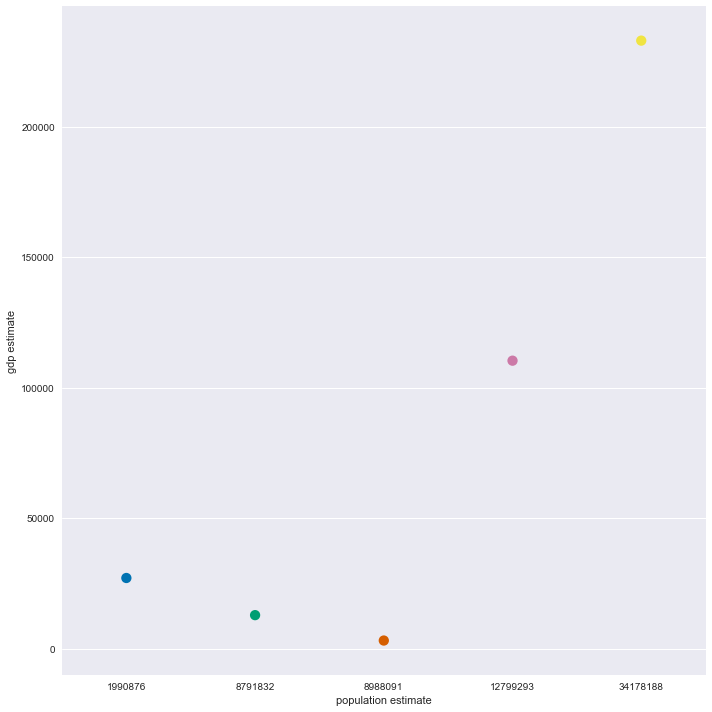

In [10]:
plot_9 = sns.factorplot(data=final_sample, x="population estimate", y="gdp estimate", palette='colorblind', size=10)

<span class="girk">PROS:</span> Depicts an inverse relationship between population size and GDP until the inflection point (in orange), just under 10,000,000 people.

<span class="burk">CONS:</span> Both axes are of different scale and because there are only 5 unique values observed for each variable in a sample where n=328, the statistical inferences that can be made are very limited. 

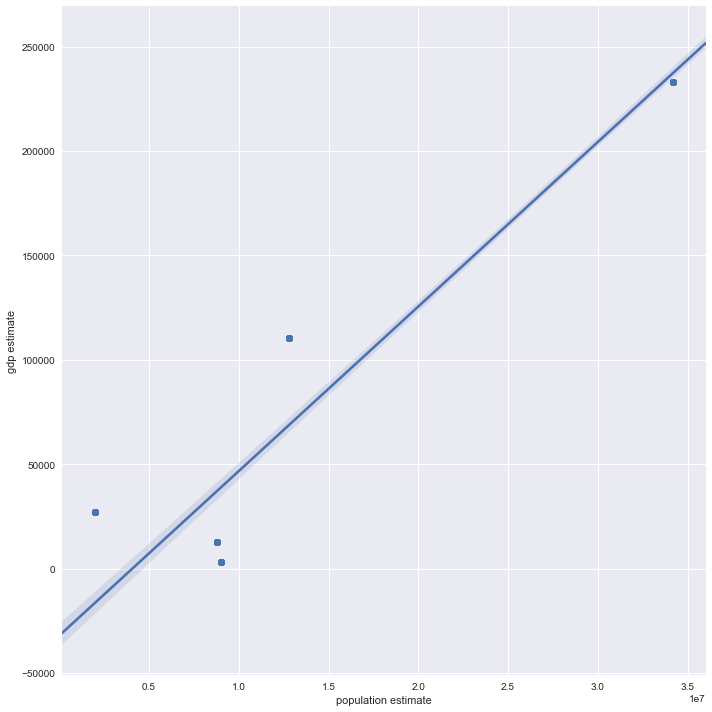

In [18]:
plot_10 = sns.lmplot(x='population estimate', y='gdp estimate', data=final_sample, size=10)

<span class="girk">PROS:</span> The line of best fit validates the relationship observed in the previous plot.

<span class="burk">CONS:</span> Both axes are of different scale and because there are only 5 unique values observed for each variable in a sample where n=328, the statistical inferences that can be made are very limited - need to apply non-parametric techniques.

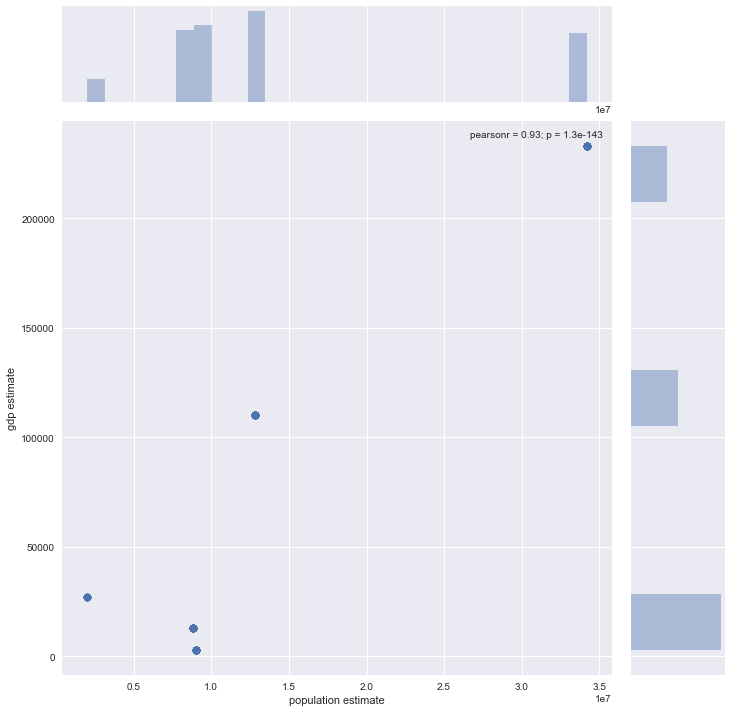

In [19]:
plot_11 = sns.jointplot(x='population estimate', y='gdp estimate', data=final_sample, size=10)

<span class="girk">PROS:</span> Produces the same outcome as the preceding plot but with a non-negative y-axis origin. Pearson's r is high (close to 1) and the p value is low (less than 0.05 assuming that's alpha). 

<span class="burk">CONS:</span> Both axes are of different scale and because there are only 5 unique values observed for each variable in a sample where n=328, the statistical inferences that can be made are very limited - need to apply non-parametric techniques.

## Plotting 1 Categorical & 1 Continuous Variable

In [7]:
pivot = final_sample.drop(final_sample.columns[[0,3,4,5,6,9]], axis=1)
pivot = final_sample.groupby(['region', 'country','language', 'degree of endangerment']).size().reset_index(name='count')
pivot.head()

region  country           language  \
0  Middle East & North Africa  Algeria           Korandje   
1  Middle East & North Africa  Algeria           Tacenwit   
2  Middle East & North Africa  Algeria         Tagargrent   
3  Middle East & North Africa  Algeria  Tamahaq (Algeria)   
4  Middle East & North Africa  Algeria  Tamazight (Arzew)   

  degree of endangerment  count  
0    Severely Endangered      1  
1             Vulnerable      1  
2    Severely Endangered      1  
3             Vulnerable      1  
4  Critically Endangered      1

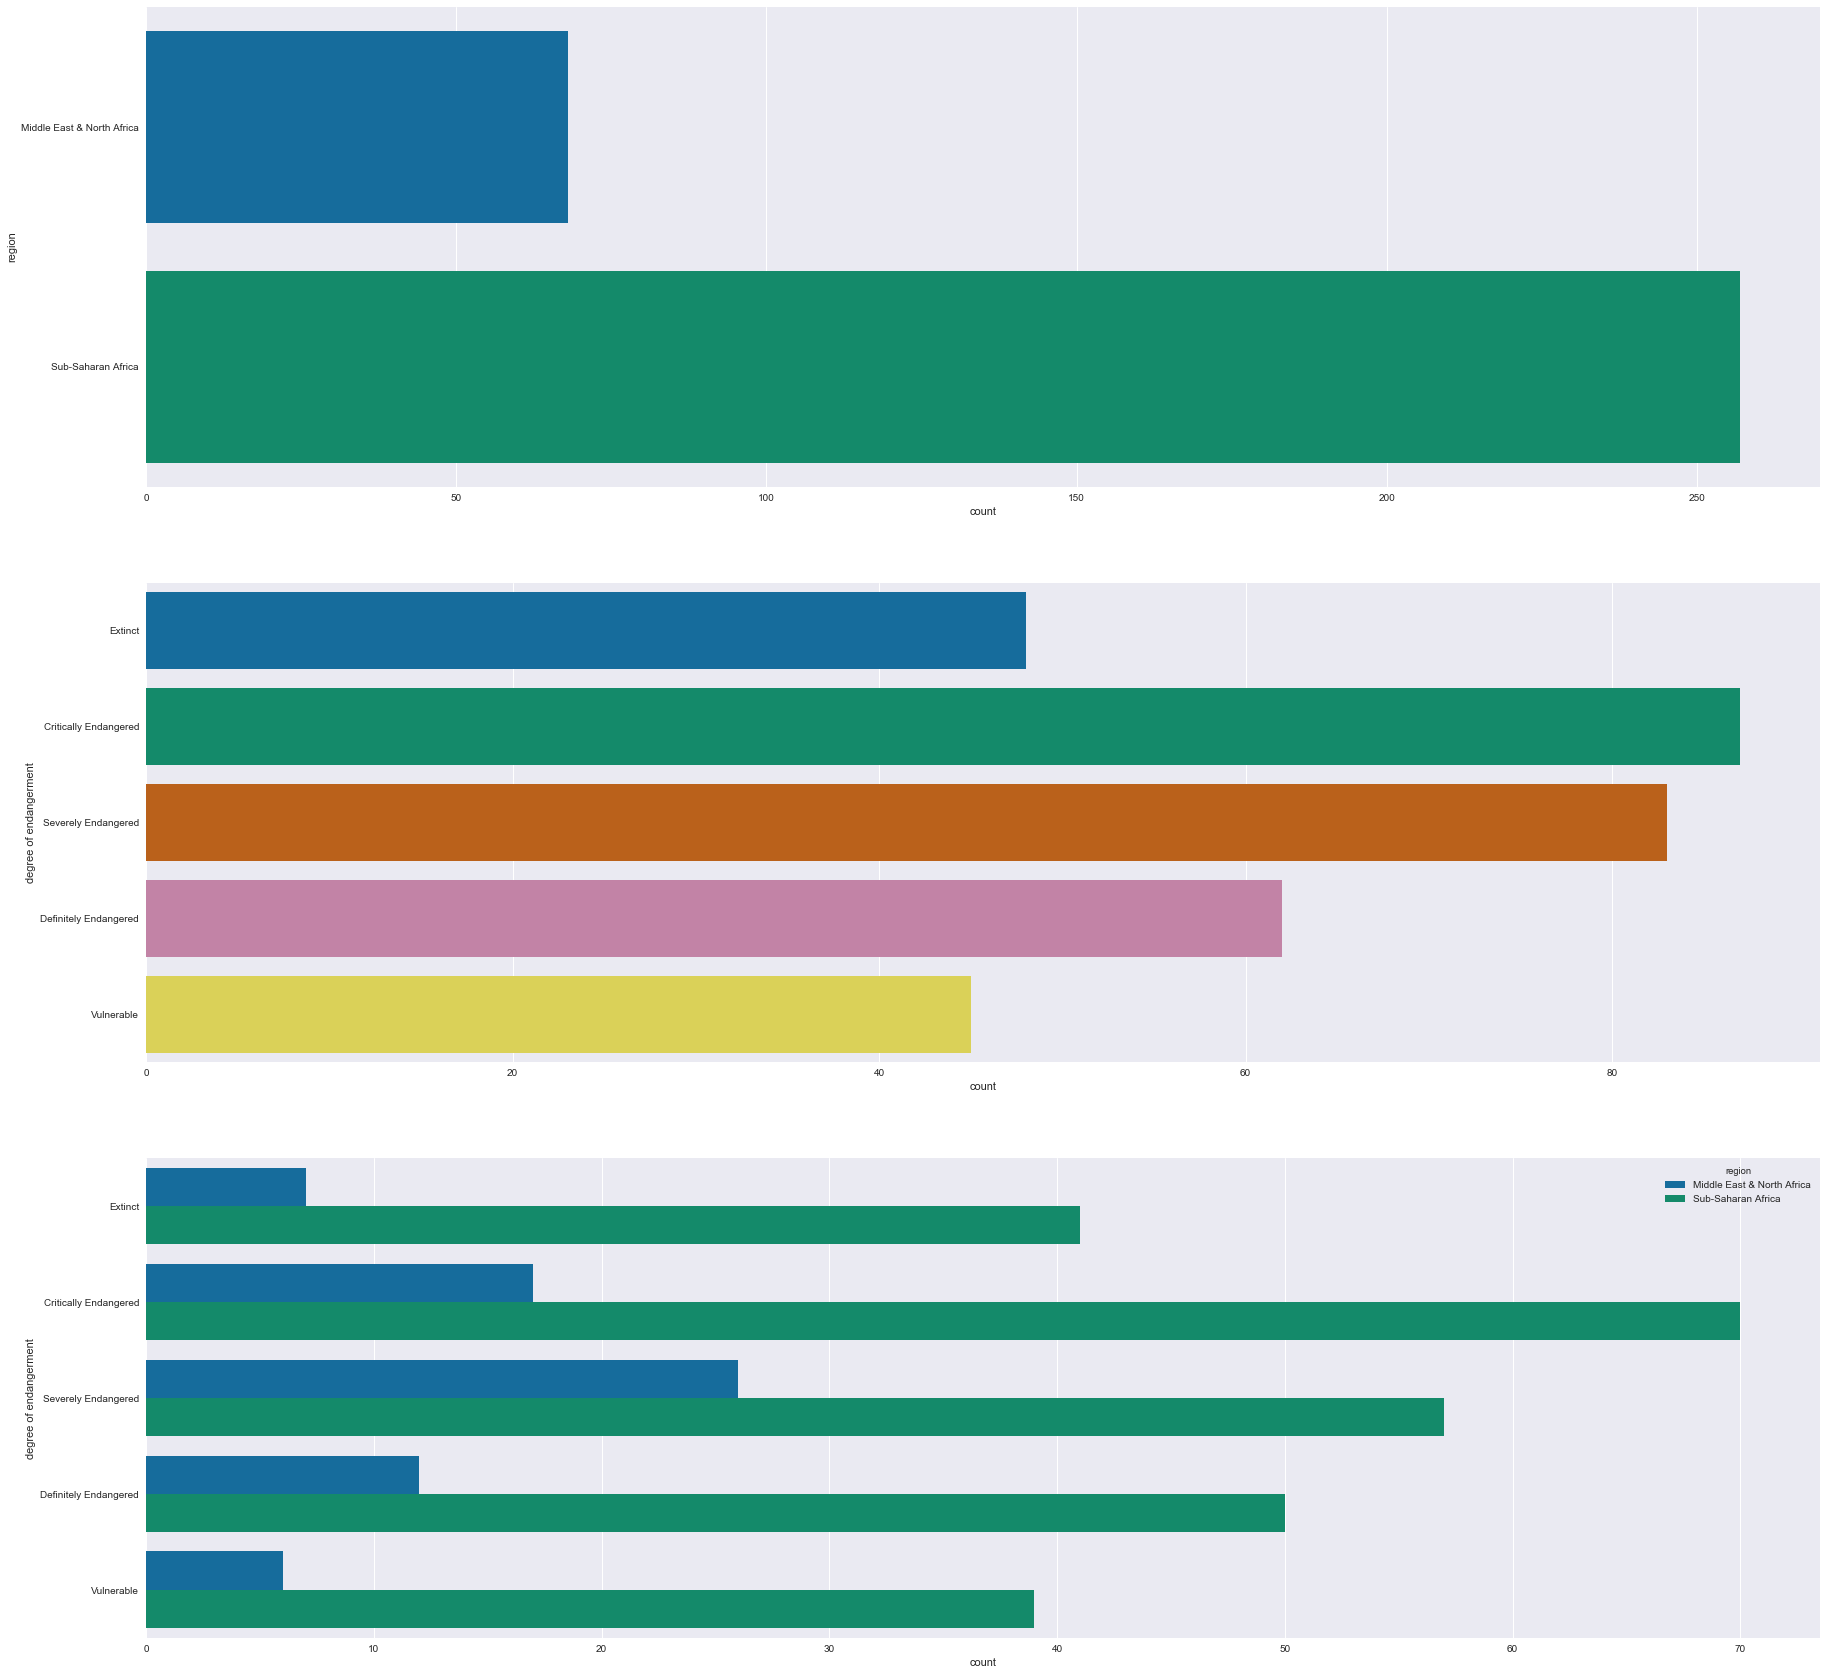

In [50]:
plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
plot_12 = sns.countplot(y="region", palette='colorblind', data=pivot)
plt.subplot(3,1,2)
plot_13 = sns.countplot(y="degree of endangerment", order=['Extinct','Critically Endangered','Severely Endangered',
                               'Definitely Endangered','Vulnerable'], palette='colorblind', data=pivot)
plt.subplot(3,1,3)
plot_14 = sns.countplot(y="degree of endangerment", hue="region", 
                        order=['Extinct','Critically Endangered','Severely Endangered',
                               'Definitely Endangered','Vulnerable'], palette='colorblind', data=pivot)

<span class="girk">PROS:</span> Concisely communicates the core insights: Sub-Saharan Africa (SSA) is home to approximately 3 times more endangered languages than the Middle East & North  Africa (MENA). In either metaregion, most languages are considered 'Critically Endangered' (3 out of 5 on the endangerment continuum with 1 as 'Vulnerable' and 5 as 'Extinct') - I would be interested to see how the distribution across categories changes over time as indigent speakers from earlier generations pass away & those languages aren't systematically preserved for posterity.

As a sidenote - this drill forced me to get much more intimate with the dataset than I previously had - by convention there are 5-6 regions as I mentioned last week, but only 2 metaregions are used here).

<span class="burk">CONS:</span> A sub-plot seemed like a great idea until it made all my plots smaller. I couldn't get a Facet Grid to produce x-axes with my choice of major ticks for consistency either.

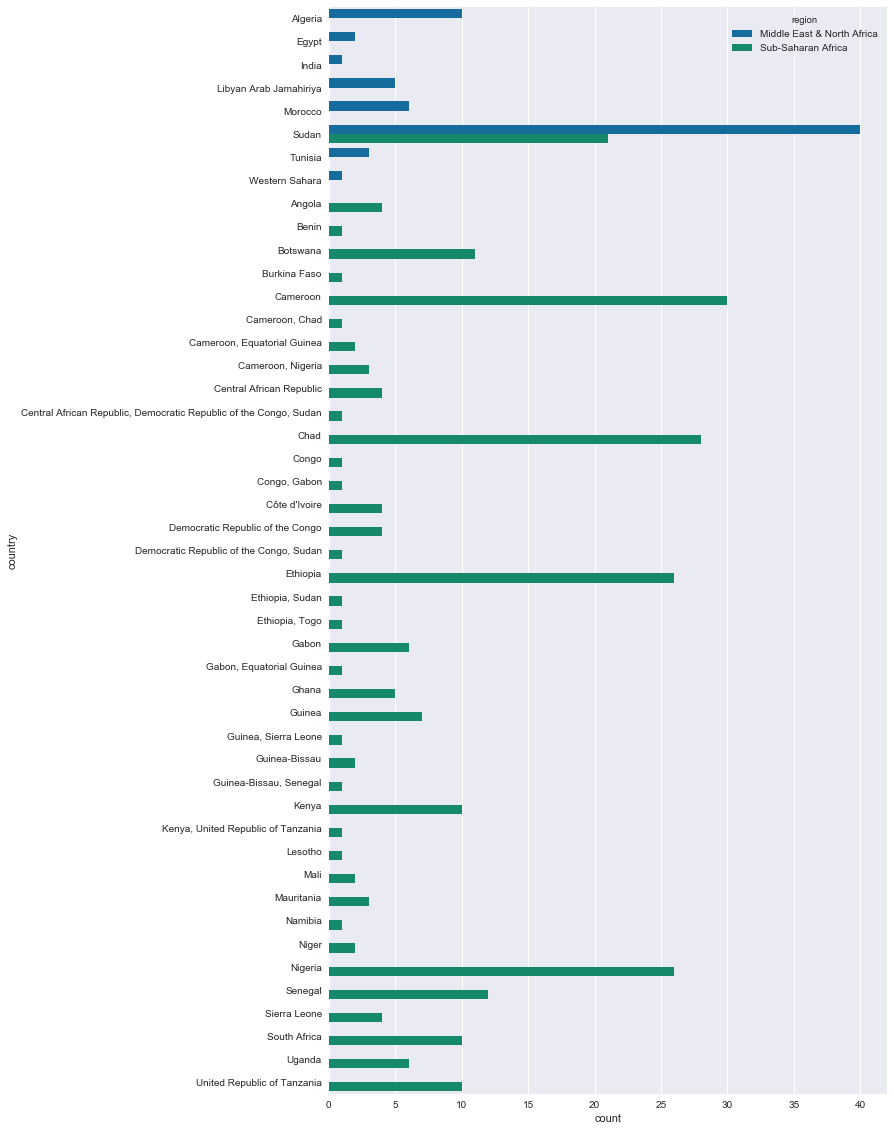

In [52]:
plt.figure(figsize=(10,20))
plot_15 = sns.countplot(y="country", data=pivot, hue='region', palette='colorblind')

<span class="girk">PROS:</span> Summarizes language distribution across countries by their metaregional classification - interestingly, there are hybrid entries for multiple countries, and there's one country that's classified into both metaregions. 

<span class="burk">CONS:</span> N/A - this was to be the precursor to a Pair Plot I started but lost that communicated the disaggregation by country shown in the Pivot Table below.

In [98]:
pivot1 = pd.pivot_table(pivot, index=['country'], columns=['degree of endangerment'], fill_value=0, aggfunc=np.sum)
pivot1.head()

count                                \
degree of endangerment Critically Endangered Definitely Endangered Extinct   
country                                                                      
Algeria                                    3                     0       0   
Angola                                     0                     1       3   
Benin                                      1                     0       0   
Botswana                                   3                     5       1   
Burkina Faso                               0                     1       0   

                                                       
degree of endangerment Severely Endangered Vulnerable  
country                                                
Algeria                                  3          4  
Angola                                   0          0  
Benin                                    0          0  
Botswana                                 0          2  
Burkina Faso                             0          0

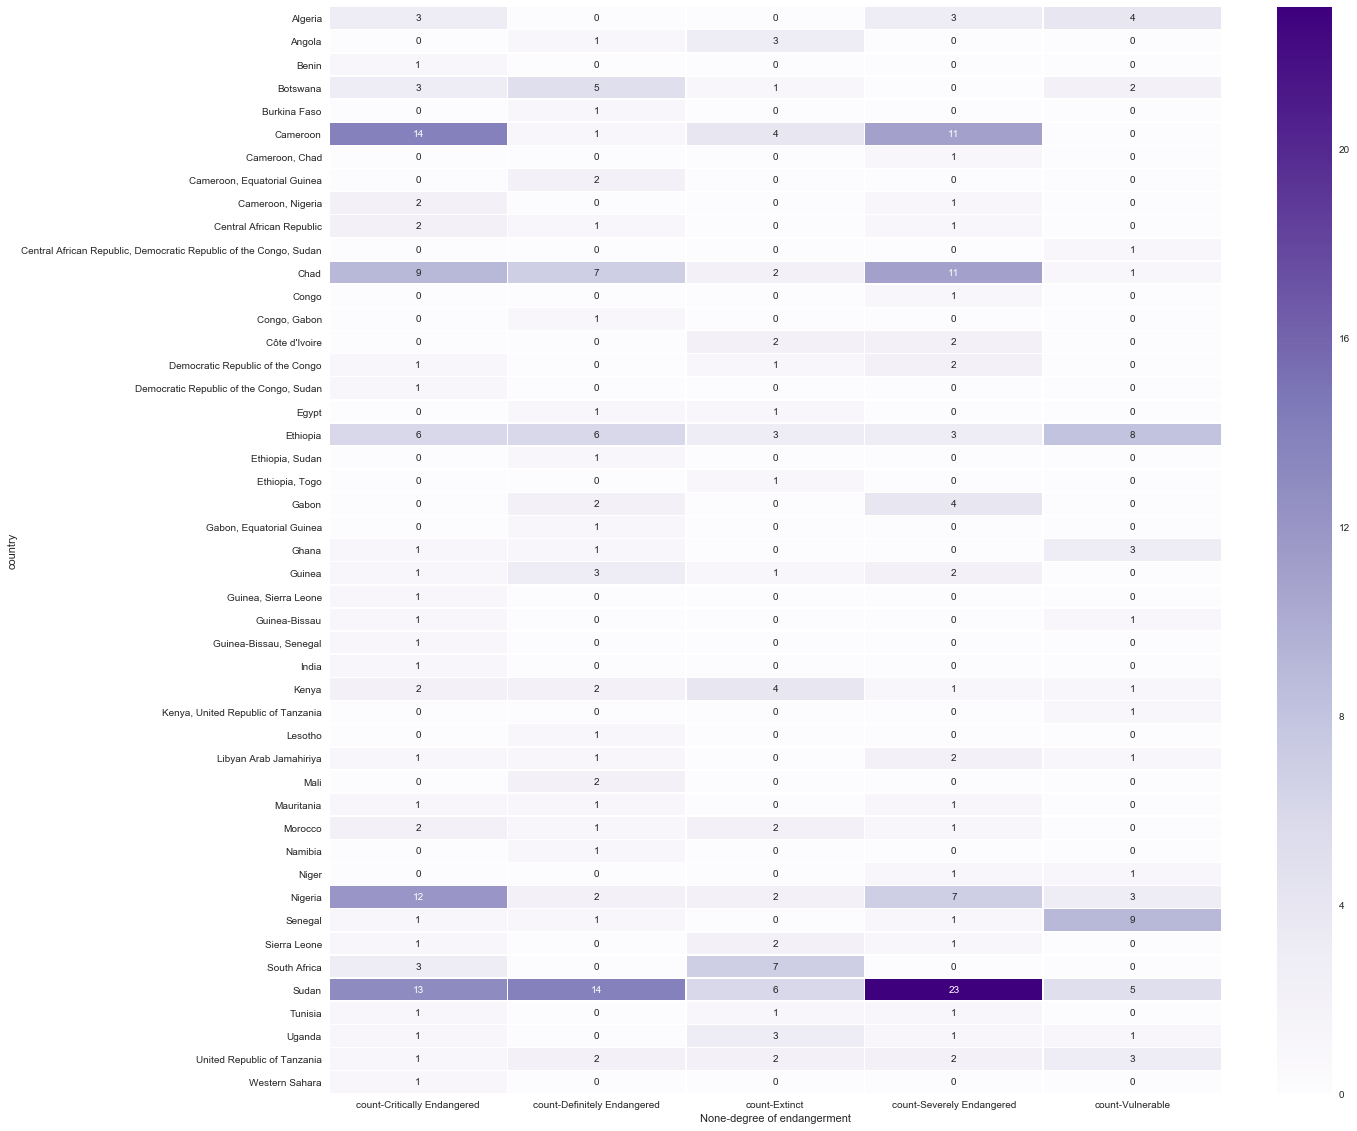

In [72]:
plt.figure(figsize=(20,20))
plot_17 = sns.heatmap(pivot1,annot=True,fmt="d",linewidths=.5,cmap='Purples')

<span class="girk">PROS:</span>  Differently communicates what the Pair Plot would have - count by status for each country's endangered languages.

<span class="burk">CONS:</span> 'Degree of Endangerment' is out of order.

In [70]:
pivot2 = final_sample.drop(final_sample.columns[[0,3,4,5,6]], axis=1)
pivot2 = pd.pivot_table(pivot2, values=['number of speakers'], index=['country'], columns=['degree of endangerment'], fill_value=0, aggfunc=np.sum)
pivot2.head()

number of speakers                                \
degree of endangerment Critically Endangered Definitely Endangered Extinct   
country                                                                      
Algeria                                82000                     0       0   
Angola                                     0                  2627       0   
Benin                                   1838                     0       0   
Botswana                                 560                 26290       0   
Burkina Faso                               0                  7800       0   

                                                       
degree of endangerment Severely Endangered Vulnerable  
country                                                
Algeria                             100000     305000  
Angola                                   0          0  
Benin                                    0          0  
Botswana                                 0       2550  
Burkina Faso                             0          0

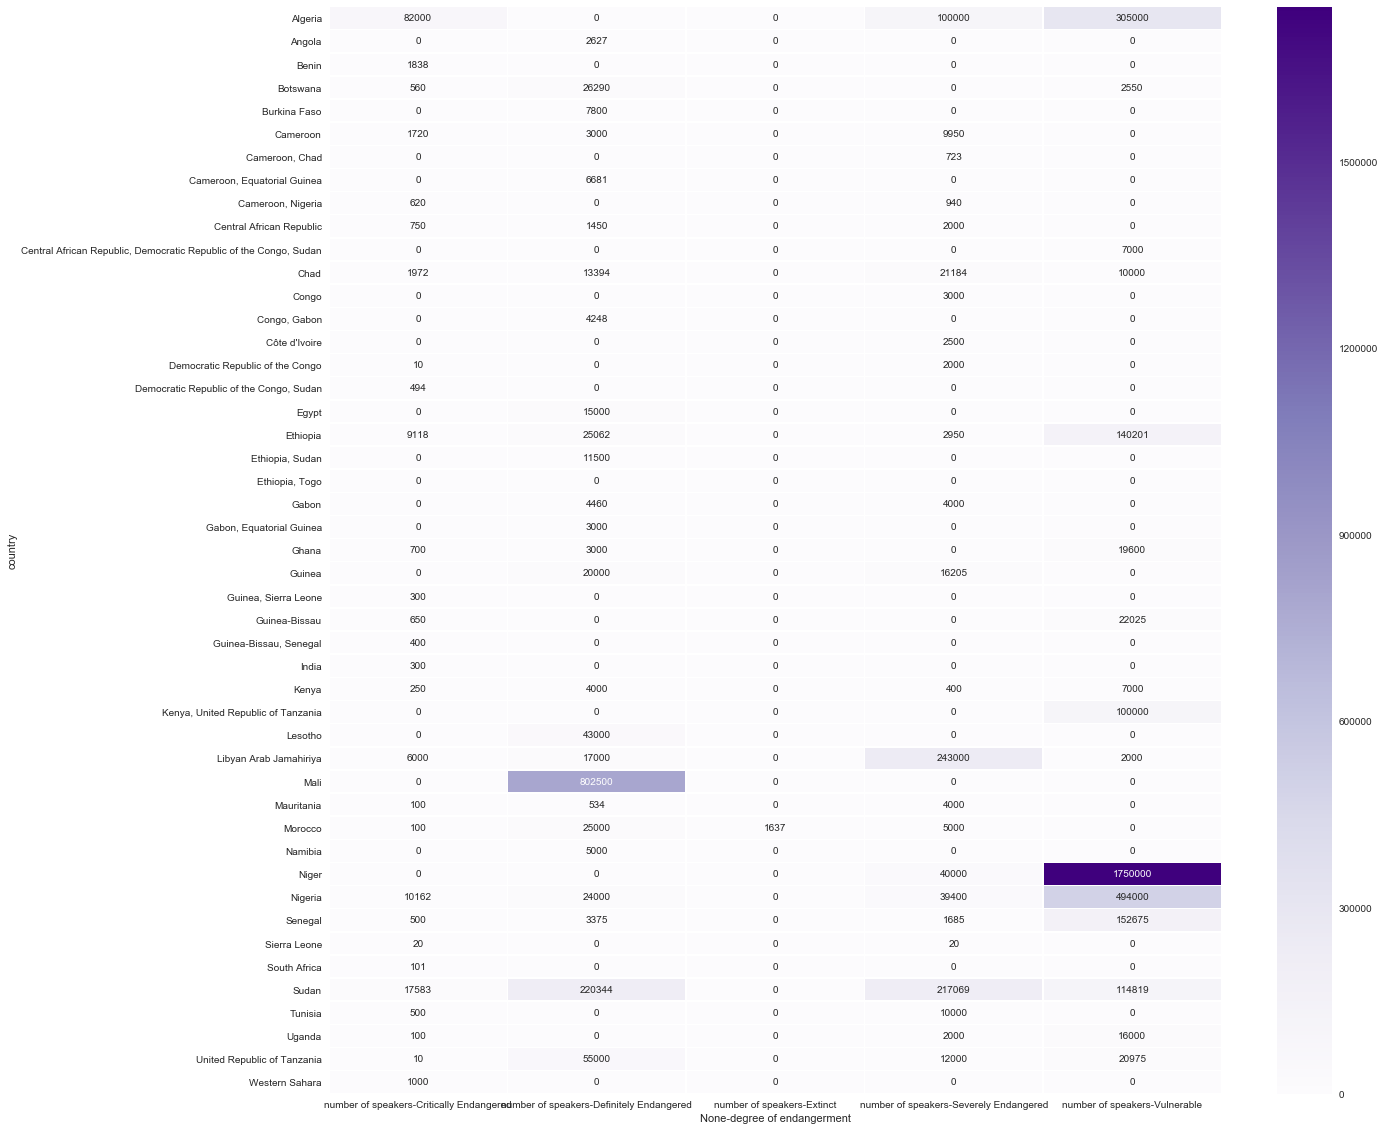

In [74]:
plt.figure(figsize=(20,20))
plot_18 = sns.heatmap(pivot2,annot=True,fmt="d",linewidths=.5,cmap='Purples')

<span class="girk">PROS:</span>  Relates the total number of speakers for each country's endangered languages to endangerment status - as expected, languages with the most indigent speakers are 'Vulnerable' or 'Definitely Endangered' while 'Extinct' languages have no indigent speakers left in all but one case.

<span class="burk">CONS:</span> 'Degree of Endangerment' is out of order.

## Plotting 4 Continuous Variables & 1 Categorical Variable

I'd had quite enough of the 'Languages' dataset by this point...This one ('Human Development') is from the United Nations Development Program.

In [15]:
undp_dataset = pd.read_csv('C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\Python Notebooks\\2 Bootcamp\\human_development.csv')
undp_sample = undp_dataset.sample(n=50)
undp_sample = undp_sample.sort_values(by='Country')
undp_sample.head()

HDI Rank              Country  Human Development Index (HDI)  \
84         85              Albania                          0.733   
57         58  Antigua and Barbuda                          0.783   
54         55              Bahamas                          0.790   
44         45              Bahrain                          0.824   
141       142           Bangladesh                          0.570   

     Life Expectancy at Birth  Expected Years of Education  \
84                       77.8                         11.8   
57                       76.1                         14.0   
54                       75.4                         12.6   
44                       76.6                         14.4   
141                      71.6                         10.0   

     Mean Years of Education Gross National Income (GNI) per Capita  \
84                       9.3                                  9,943   
57                       9.2                                 20,070   
54                      10.9                                 21,336   
44                       9.4                                 38,599   
141                      5.1                                  3,191   

     GNI per Capita Rank Minus HDI Rank  
84                                   14  
57                                   -1  
54                                   -3  
44                                  -20  
141                                   5

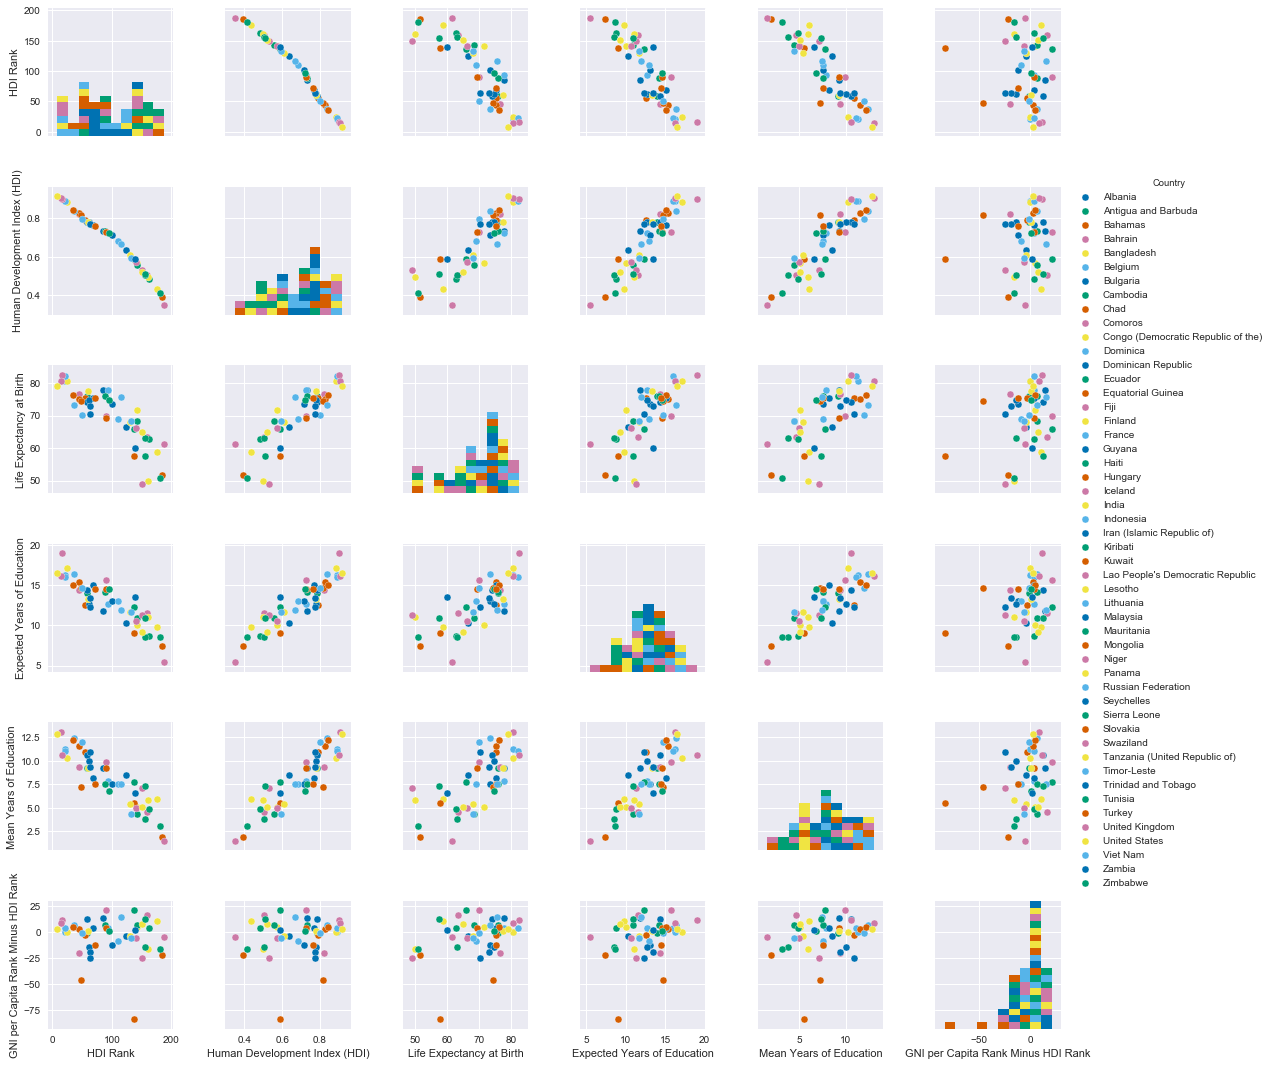

In [39]:
plot_19 = sns.pairplot(undp_sample, hue="Country", palette="colorblind")

<span class="girk">PROS:</span>  The correlation matrix explores every relationship combination for the human development indices provided.

<span class="burk">CONS:</span> Aside from the correlation direction/strength and general shape/skew of the distributions, not much else can be concluded about the data - the diagonal histograms are overlaid onto each other and the color palette repeats. Decreasing the sample size made observing an actual correlation/distribution more difficult.